# Marketing do Banco

Com o dataset escolhido, pretende-se analisar um conjunto de dados onde se identifica conhecimento sobre as campanhas
promocionais realizadas por um banco em que se pretende prever a adesão dos clientes após o
contacto promocional.


## O dataset contem 45211 casos e 17 features. 

### Input features (bank client data)
 - age - (numeric) 
 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 - education (categorical: 'tertiary' 'secondary' 'unknown' 'primary')
 - default: has credit in default? (categorical: 'no','yes','unknown')
 - balance: Balance the client possesses
 - housing: has housing loan? (categorical: 'no','yes','unknown')
 - loan: has personal loan? (categorical: 'no','yes','unknown')
 - contact: contact communication type (categorical: 'cellular','telephone')
 - day: last contact day (numeric)
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown', 'other','success')

## Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')
 
### Disponível em : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Importar Bibliotecas

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
%matplotlib inline

## Organização do dataset
O dataset está no formato CSV. Contudo, o separador das colunas 'e o ';'.

In [4]:
bank = pd.read_csv('bank-full.csv', sep=';')

## Exploração dos dados

Vista básica do dataset, inicial.

In [5]:
bank.shape

(45211, 17)

In [6]:
print(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Missing Values

Verifica-se que no dataset não existem valores perdidos.

In [9]:
bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [10]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Valores Duplicados

O dataset não tem qualquer valor duplicado.
Tratamento para caso tenha (drop).

In [12]:
print(bank.duplicated().sum())
print(bank.drop_duplicates(inplace=True))
print(bank.info())

0
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB
None


## Analisar a correspondência entre o target output e os atributos categóricos

 - 1) Analisar o target com o número de ocorrências no dataset;
 - 2) Analisar o target com o trabalho do cliente;
 - 3) Analisar o target com o estado civil do cliente;
 - 4) Analisar o target com o tipo de contacto do cliente;
 - 5) Analisar o target com o resultado da campanha anterior;
 - 6) Analisar o target com o nível de educação do cliente;
 - 7) Analisar o target com o mês onde a campanha foi efetuada;
 - 8) Analisar o target com o estado do crédito;
 - 9) Analisar o target com o empr imobiliário do cliente;
 - 10) Analisar o target com o facto do cliente ter ou não um empréstimo;

<AxesSubplot:title={'center':'Subscreveu ou não a um depósito'}>

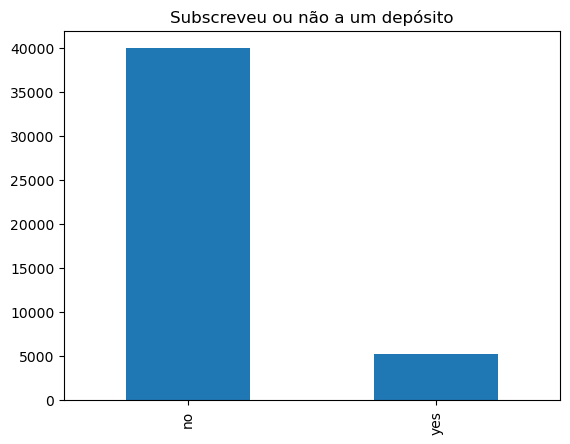

In [13]:
y_count = bank['y'].value_counts()
y_count.plot.bar(title = 'Subscreveu ou não a um depósito')

<AxesSubplot:title={'center':'Trabalho e target output'}>

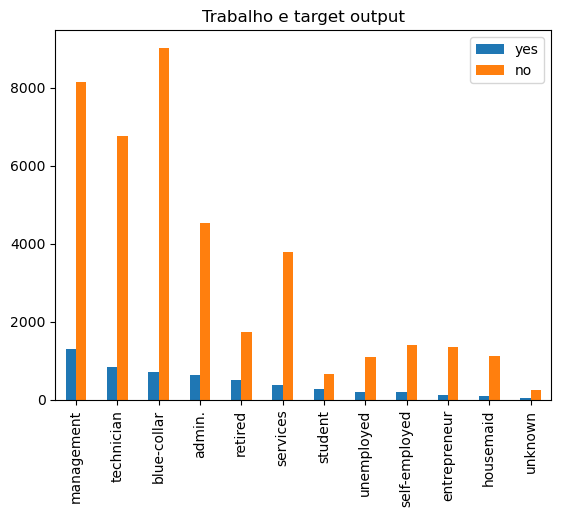

In [14]:
job_target = pd.DataFrame()

job_target['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
job_target['no'] = bank[bank['y'] == 'no']['job'].value_counts()

job_target.plot.bar(title = 'Trabalho e target output')

In [15]:
#percentagem de pessoas que subscreveram um depósito por profissão
(job_target['yes'] / (job_target['yes'] + job_target['no'])) * 100

management       13.755551
technician       11.056996
blue-collar       7.274969
admin.           12.202669
retired          22.791519
services          8.883004
student          28.678038
unemployed       15.502686
self-employed    11.842939
entrepreneur      8.271688
housemaid         8.790323
unknown          11.805556
dtype: float64

<AxesSubplot:title={'center':'Estado Civil e target output'}>

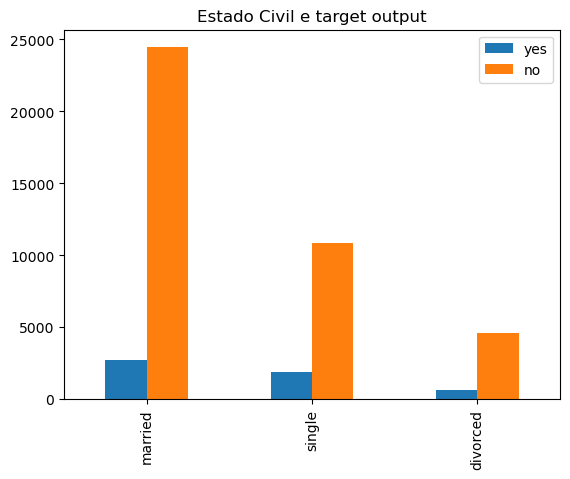

In [16]:
marital_target = pd.DataFrame()

marital_target['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
marital_target['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

marital_target.plot.bar(title = 'Estado Civil e target output')

In [17]:
#percentagem de pessoas que subscreveram um depósito por estado civil
(marital_target['yes'] / (marital_target['yes'] + marital_target['no'])) * 100

married     10.123466
single      14.949179
divorced    11.945458
dtype: float64

<AxesSubplot:title={'center':'Tipo de contacto e target output'}>

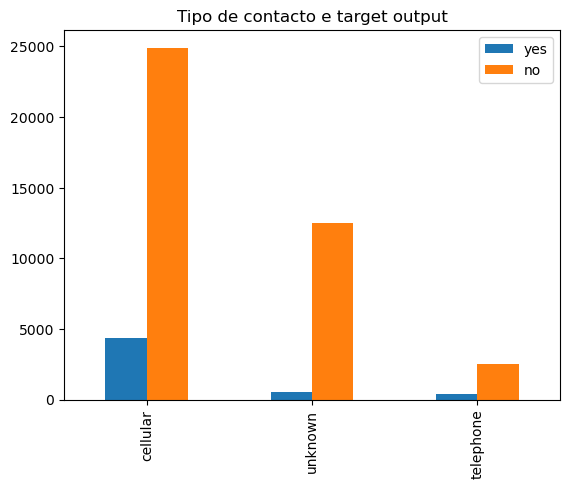

In [18]:
contact_target = pd.DataFrame()

contact_target['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()
contact_target['no'] = bank[bank['y'] == 'no']['contact'].value_counts()

contact_target.plot.bar(title = 'Tipo de contacto e target output')

In [19]:
#percentagem de pessoas que subscreveram um depósito por tipo de contacto
(contact_target['yes'] / (contact_target['yes'] + contact_target['no'])) * 100


cellular     14.918900
unknown       4.070661
telephone    13.420509
dtype: float64

<AxesSubplot:title={'center':'Resultado da campanha anterior e target output'}>

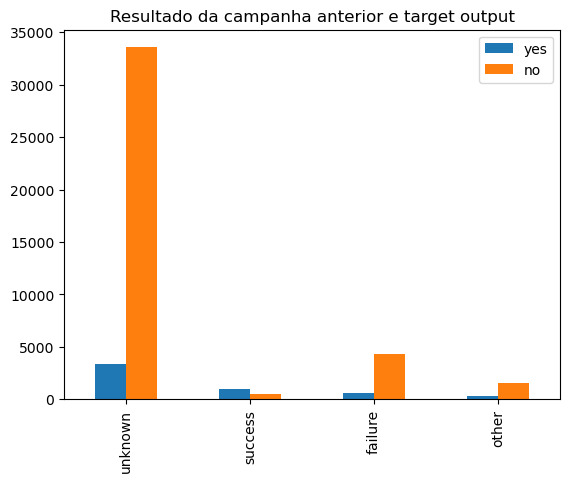

In [20]:
poutcome_target = pd.DataFrame()

poutcome_target['yes'] = bank[bank['y'] == 'yes']['poutcome'].value_counts()
poutcome_target['no'] = bank[bank['y'] == 'no']['poutcome'].value_counts()

poutcome_target.plot.bar(title = 'Resultado da campanha anterior e target output')

In [21]:
#percentagem de pessoas que subscreveram um depósito por resultado da campanha anterior
(poutcome_target['yes'] / (poutcome_target['yes'] + poutcome_target['no'])) * 100

unknown     9.161503
success    64.725347
failure    12.609671
other      16.684783
dtype: float64

<AxesSubplot:title={'center':'Nível da educação e target output'}>

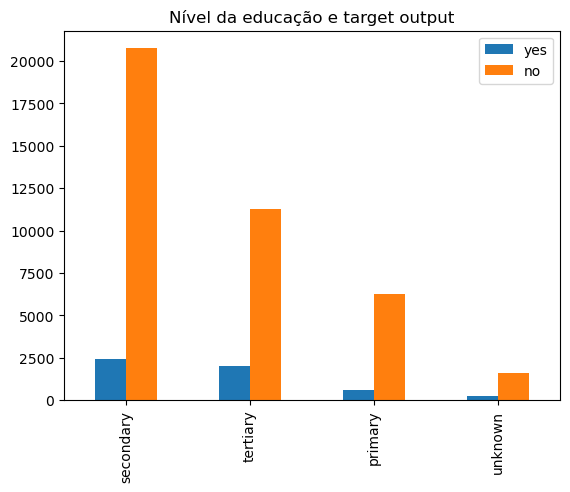

In [22]:
edu_target = pd.DataFrame()

edu_target['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
edu_target['no'] = bank[bank['y'] == 'no']['education'].value_counts()

edu_target.plot.bar(title = 'Nível da educação e target output')

In [23]:
#percentagem de pessoas que subscreveram um depósito por nível de educação
(edu_target['yes'] / (edu_target['yes'] + edu_target['no'])) * 100

secondary    10.559435
tertiary     15.006390
primary       8.626478
unknown      13.570275
dtype: float64

<AxesSubplot:title={'center':'Mês e target output'}>

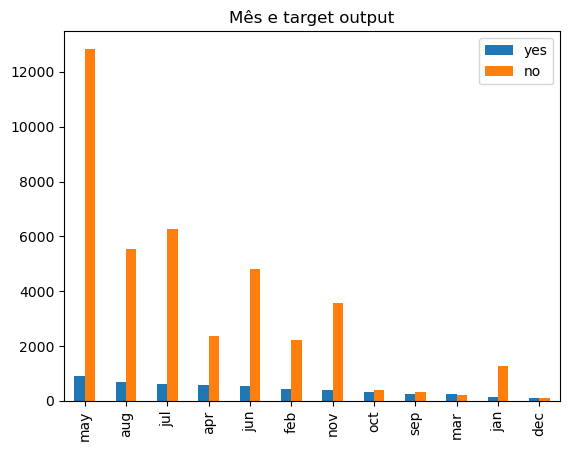

In [24]:
mon_target = pd.DataFrame()

mon_target['yes'] = bank[bank['y'] == 'yes']['month'].value_counts()
mon_target['no'] = bank[bank['y'] == 'no']['month'].value_counts()

mon_target.plot.bar(title = 'Mês e target output')

In [25]:
#percentagem de pessoas que subscreveram um depósito por mês
(mon_target['yes'] / (mon_target['yes'] + mon_target['no'])) * 100

may     6.719454
aug    11.013286
jul     9.093546
apr    19.679400
jun    10.222805
feb    16.647792
nov    10.151134
oct    43.766938
sep    46.459413
mar    51.991614
jan    10.121169
dec    46.728972
dtype: float64

<AxesSubplot:title={'center':'Crédito por default e target output'}>

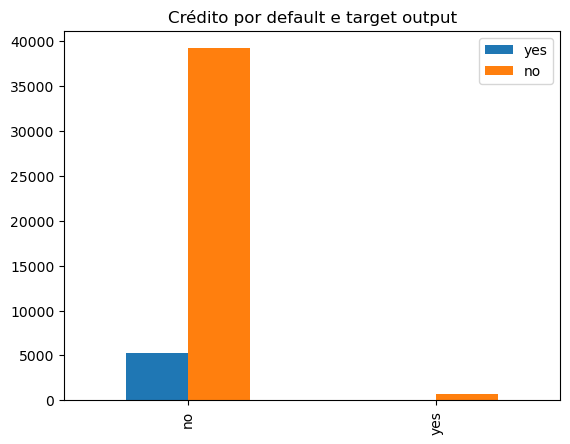

In [26]:
def_target = pd.DataFrame()

def_target['yes'] = bank[bank['y'] == 'yes']['default'].value_counts()
def_target['no'] = bank[bank['y'] == 'no']['default'].value_counts()

def_target.plot.bar(title = 'Crédito por default e target output')

<AxesSubplot:title={'center':'Empréstimo imobiliário e target output'}>

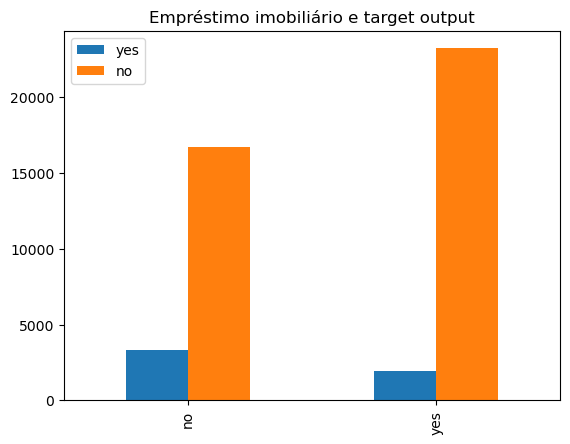

In [27]:
hou_target = pd.DataFrame()

hou_target['yes'] = bank[bank['y'] == 'yes']['housing'].value_counts()
hou_target['no'] = bank[bank['y'] == 'no']['housing'].value_counts()

hou_target.plot.bar(title = 'Empréstimo imobiliário e target output')

In [28]:
#percentagem de pessoas que subscreveram um depósito por empréstimo imobiliário
(hou_target['yes'] / (hou_target['yes'] + hou_target['no'])) * 100

no     16.702355
yes     7.699960
dtype: float64

<AxesSubplot:title={'center':'Empréstimo pessoal e target output'}>

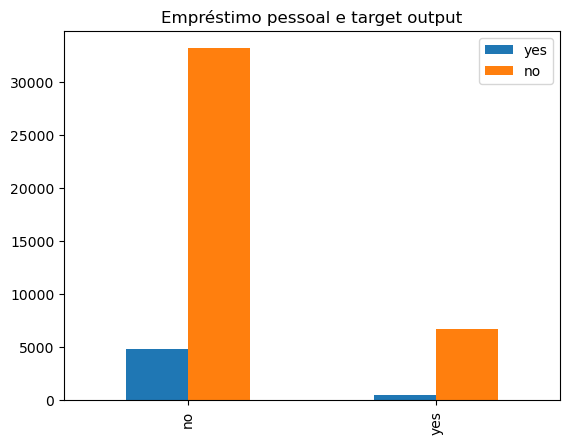

In [29]:
loan_target = pd.DataFrame()

loan_target['yes'] = bank[bank['y'] == 'yes']['loan'].value_counts()
loan_target['no'] = bank[bank['y'] == 'no']['loan'].value_counts()

loan_target.plot.bar(title = 'Empréstimo pessoal e target output')

In [30]:
#percentagem de pessoas que subscreveram um depósito por empréstimo pessoal
(loan_target['yes'] / (loan_target['yes'] + loan_target['no'])) * 100

no     12.655727
yes     6.681391
dtype: float64

## Preparação dos Dados

### Valores categóricos binários 'yes' ou 'no'

Transformar em valores numéricos (aplicar label encoding):
 - yes (target)
 - default
 - housing
 - loan

In [31]:
bank['y'] = np.where(bank['y'] == "yes", 1, 0)
bank['default'] = np.where(bank['default'] == "yes", 1, 0)
bank['housing'] = np.where(bank['housing'] == "yes", 1, 0)
bank['loan'] = np.where(bank['loan'] == "yes", 1, 0)

### Atributo 'month'

Através de label encoding, dado aos meses terem uma ordem explícita, pelos quais estão organizados.
Verificou-se em cima que em março a percentagem de aceitação do depósito é maior.

In [32]:
map_month = {'month' : {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}}
bank.replace(map_month, inplace=True)

### Atributo 'pdays'

Para este atributo "-1" simboliza que o cliente não foi contactado ou que não existe informação sobre esse dados.
No entanto, mais de 75% dos dados da coluna,m então será melhor retirá-la; dado a ser muito inconsistente.

<AxesSubplot:title={'center':'Número de dias que passaram após o último contacto de uma campanha anterior e target output'}>

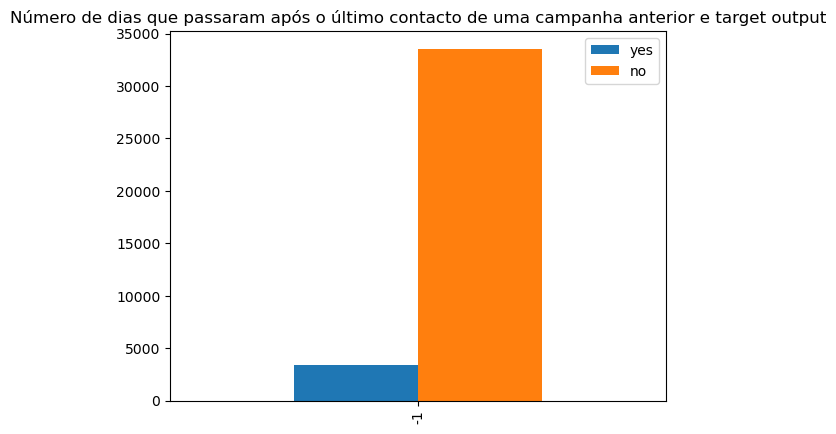

In [33]:
pdays = pd.DataFrame()

pdays['yes'] = bank[(bank['y'] == 1) & (bank['pdays'] == -1)]['pdays'].value_counts()
pdays['no'] = bank[(bank['y'] == 0) & (bank['pdays'] == -1)]['pdays'].value_counts()
pdays.plot.bar(title = 'Número de dias que passaram após o último contacto de uma campanha anterior e target output')

<AxesSubplot:title={'center':'Número de dias que passaram após o último contacto de uma campanha anterior e target output'}>

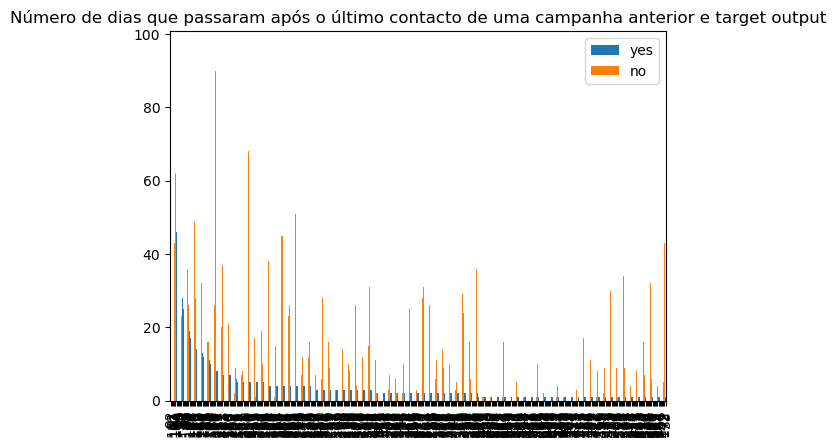

In [34]:
pdays_target = pd.DataFrame()

pdays_0 = pd.DataFrame()
pdays_0['yes'] = bank[(bank['y'] == 1) & (bank['pdays'] > -1)]['pdays'].value_counts()
pdays_0['no'] = bank[(bank['y'] == 0) & (bank['pdays'] > -1)]['pdays'].value_counts()
pdays_0.plot.bar(title = 'Número de dias que passaram após o último contacto de uma campanha anterior e target output')

In [35]:
#dividiro atributor pdays em 2 grupos: pdays = -1 e pdays > -1 e depois divir o grupo pdays > -1 em k bins
replace_map = {'pdays' : {}}
months = 0
for i in range(1, bank['pdays'].max() + 1):
    replace_map['pdays'][i] = months
    if i % 30 == 0:
        months += 1

bank.replace(replace_map, inplace=True)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,6,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


In [36]:
bank['pdays'].value_counts()

-1     36954
 6      1247
 3      1181
 11     1093
 5       852
 8       628
 12      628
 9       507
 10      489
 4       447
 2       424
 7       207
 0       188
 1       106
 15       51
 13       50
 14       39
 17       22
 16       19
 18       18
 25       12
 19        9
 22        9
 26        8
 21        6
 20        4
 27        4
 24        3
 28        3
 23        2
 29        1
Name: pdays, dtype: int64

In [37]:
bank['pdays'].describe()

count    45211.000000
mean         0.463228
std          3.501482
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max         29.000000
Name: pdays, dtype: float64

### Atributo 'poutcome'

Observa-se que tem dois atributos - 'unknown' e 'other'.
O valor 'unknown' não traz informação adicional, pelo que justifica-se 
inseri-lo dentro do valor 'other'.
Apesar de não terem exatamente o mesmo significado, no contexto do problema, simbolizam o mesmo.

Adicionalmente, com label encoding, alteramos:
 - success -> 1
 - failure -> 0
 - other   -> -1
 
 ...uma vez que existe uma ordem implícita, desde exceção, sucesso e falha.
 Apesar da maioria esmagadora encontrar-se no other, temos pela observação do gráfico em cima que, quando é sucesso,
 a probabilidade de fazer um depósito é maior.

In [38]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [39]:
map_poutcome = { 'poutcome' : {'unknown' : 'other' }}
bank.replace(map_poutcome, inplace=True)

In [40]:
bank['poutcome'].value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [41]:
map_poutcome = { 'poutcome' : {'other' : -1 , 'success' : 1 , 'failure' : 0}}
bank.replace(map_poutcome, inplace=True)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,-1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,-1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,-1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,-1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,-1,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,-1,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,6,3,1,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,-1,0


### Atributo 'balance'

Conseguimos visuaizar pela boxplot, que o atributo balance tem um elevado número
de outliers, nomeadamente no seu upper bound.

Deste modo, o seu tratamento vai divergir.

Definiu-se que se o número de outliers fosse inferior a 5%, procedia-se à remoção das respetivas linhas, caso contrário escolhia-se a melhor opção (neste caso para valores numéricos).

Como os valores no lower bound correspondem a menos de 5% dos dados, na totalidade, 
procede-se à sua remoção. São na totalidade 1962 correspondências.

Por outro lado, no upper bound, os outliers correspondem a 10% da totalidade dos dados; 
Neste caso, escolheu-se a transformação com log (Log Transformation) uma vez que o atributo tem valores muito enviesados.
Neste caso, os valores vão ser aproximados ao normal; dentro das possibilidades.

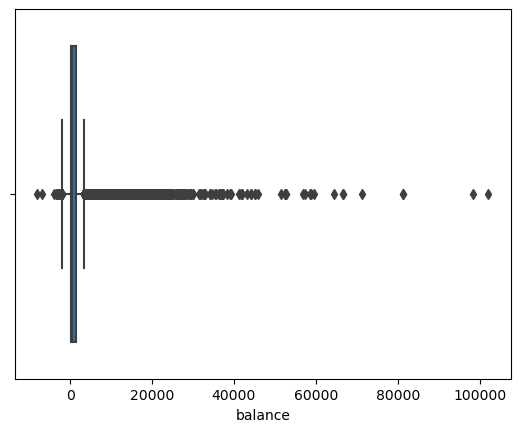

In [42]:
sns.boxplot(x = bank['balance'])
plt.show()

Obter o valore do lower e upper bound da feature balance.

In [43]:
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lowerLim = Q1 - 1.5 * IQR
upperLim = Q3 + 1.5 * IQR

print(lowerLim)
print(upperLim)

1356.0
-1962.0
3462.0


Obter o número de valores no upper e lower bound.

In [44]:
bank[bank['balance'] < lowerLim]['balance'].count()

17

In [45]:
bank[bank['balance'] > upperLim]['balance'].count()

4712

In [46]:
bank = bank.drop(bank.loc[bank['balance'] < lowerLim].index)
bank.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='balance'>

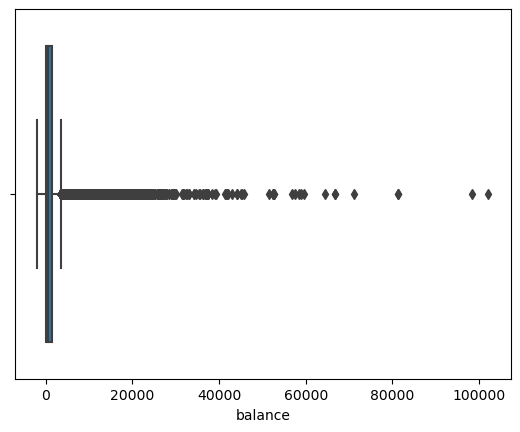

In [47]:
sns.boxplot(x = bank['balance'])

In [48]:
bank['balance'].mask(bank['balance'] > upperLim, upperLim, inplace=True)

<AxesSubplot:xlabel='balance'>

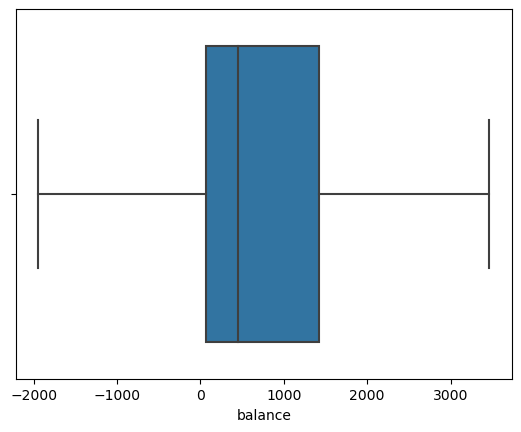

In [49]:
sns.boxplot(x = bank['balance'])

In [50]:
scaler = MinMaxScaler(feature_range=(-1,1))
bank['balance'] = scaler.fit_transform(bank[['balance']])

### Atributo 'previous'

Após uma breve análise do atributo previous, interpretou-se que o valor 0 tem um significado
especial em relação aos demais valores. 

Para além disso, existe uma grande discrepância nos
valores ̸= 0, levando à existência de bastantes outliers. 

Assim, optou-se por substituir como:
previous = 0 => "0"
previous > 0 => "1"
Permitindo categorizar entre: nunca ter recebido contacto ou já ter recebido, levando à manutenção da precisão global.

Ou seja, proceder a uma normalização dos dados.

In [51]:
bank['previous'].value_counts()

0      36937
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

<AxesSubplot:title={'center':'Número de contactos realizados antes desta campanha e target output'}>

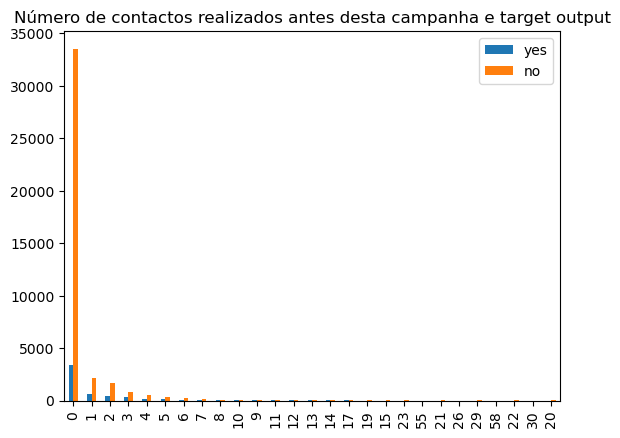

In [52]:
previous_target = pd.DataFrame()
previous_target['yes'] = bank[bank['y'] == 1]['previous'].value_counts()
previous_target['no'] = bank[bank['y'] == 0]['previous'].value_counts()
previous_target.plot.bar(title = 'Número de contactos realizados antes desta campanha e target output')

In [53]:
bank['previous'].mask(bank['previous'] > 0, 1, inplace=True)
print(bank['previous'])

0        0
1        0
2        0
3        0
4        0
        ..
45189    0
45190    0
45191    1
45192    0
45193    1
Name: previous, Length: 45194, dtype: int64


### Atributo 'age'

A análise da idade foi efetuado com recurso à construção de um scatter plot com o número de
ocorrências de cada idade. 

Pode-se visualizar que a distribução é pouco uniforme, com
maior ênfase na idade entre os 31 e 60 anos. 

Assim, para homogeneizar a amostra procedemos ao binning dos dados;
Neste caso, com 4 bins.


In [54]:
age_counts = bank['age'].value_counts()
bank['age_count'] = bank['age'].map(age_counts)
print(bank['age_count'])

0         740
1        1136
2        1972
3        1088
4        1972
         ... 
45189     934
45190      54
45191      52
45192     827
45193    1696
Name: age_count, Length: 45194, dtype: int64


<AxesSubplot:xlabel='age', ylabel='age_count'>

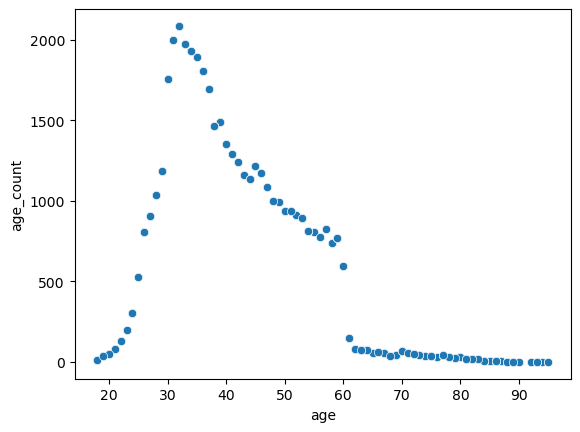

In [55]:
sns.scatterplot(data=bank, x="age", y="age_count")

In [56]:
bank = bank.drop('age_count', axis=1)

In [57]:
estimator = preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
bank['age'] = estimator.fit_transform(bank[['age']])

print('Bin Edges')
print(estimator.bin_edges_[0])
print('Age groups')
print (bank.groupby(by=['age']).count())

Bin Edges
[18. 33. 39. 48. 95.]
Age groups
       job  marital  education  default  balance  housing   loan  contact  \
age                                                                         
0.0  11110    11110      11110    11110    11110    11110  11110    11110   
1.0  10762    10762      10762    10762    10762    10762  10762    10762   
2.0  11147    11147      11147    11147    11147    11147  11147    11147   
3.0  12175    12175      12175    12175    12175    12175  12175    12175   

       day  month  duration  campaign  pdays  previous  poutcome      y  
age                                                                      
0.0  11110  11110     11110     11110  11110     11110     11110  11110  
1.0  10762  10762     10762     10762  10762     10762     10762  10762  
2.0  11147  11147     11147     11147  11147     11147     11147  11147  
3.0  12175  12175     12175     12175  12175     12175     12175  12175  


### Atributo 'education'

Neste caso, será feito label enconding, por existir uma ordem explícita, com a exceção do caso unknown.
Este último representa uma pequena parte do dataset, pelo que será removido.

In [58]:
bank['education'].value_counts()

secondary    23198
tertiary     13290
primary       6849
unknown       1857
Name: education, dtype: int64

In [59]:
bank.drop(bank[bank['education'] == "unknown"].index, inplace=True)
bank.reset_index(drop=True, inplace=True)

In [60]:
map_education = { 'education' : {'primary' : 1, 'secondary' : 2, 'tertiary' : 3 }}
bank.replace(map_education, inplace=True)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3.0,management,married,3,0,0.512024,1,0,unknown,5,5,261,1,-1,0,-1,0
1,2.0,technician,single,2,0,-0.270070,1,0,unknown,5,5,151,1,-1,0,-1,0
2,1.0,entrepreneur,married,2,0,-0.280059,1,1,unknown,5,5,76,1,-1,0,-1,0
3,1.0,management,married,3,0,-0.195339,1,0,unknown,5,5,139,1,-1,0,-1,0
4,0.0,management,single,3,0,-0.115427,1,1,unknown,5,5,217,1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43332,3.0,technician,married,3,0,0.024417,0,0,cellular,17,11,977,3,-1,0,-1,1
43333,3.0,retired,divorced,1,0,0.358861,0,0,cellular,17,11,456,2,-1,0,-1,1
43334,3.0,retired,married,2,0,1.000000,0,0,cellular,17,11,1127,5,6,1,1,1
43335,3.0,blue-collar,married,2,0,-0.033666,0,0,telephone,17,11,508,4,-1,0,-1,0


### Análise do heatmap

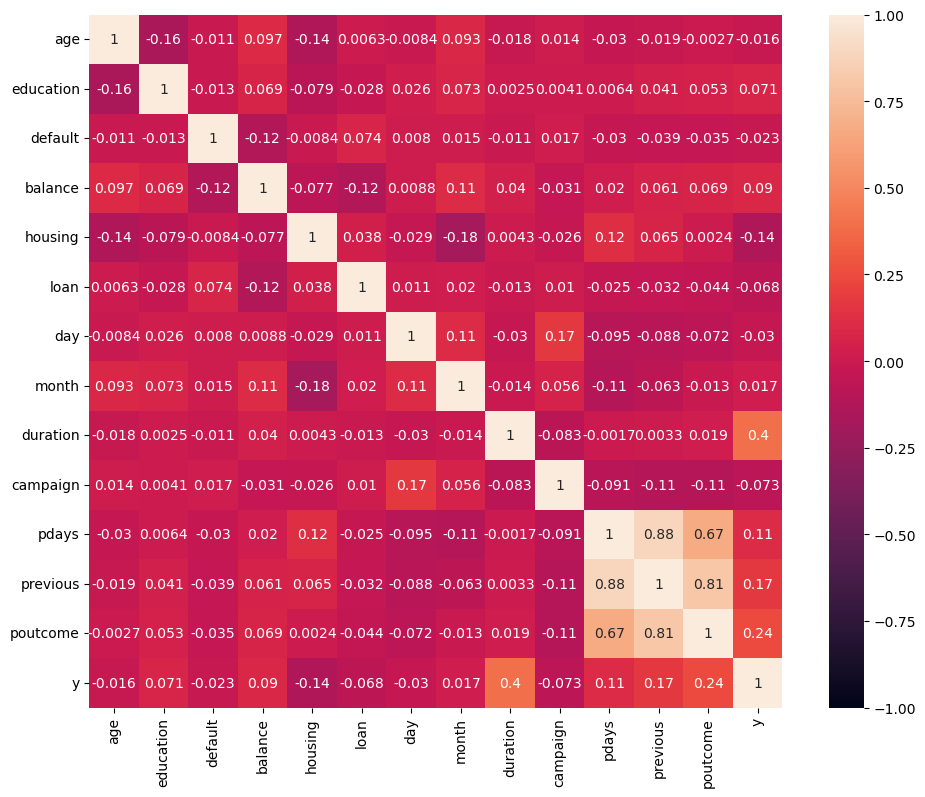

In [61]:
#Correlation
corr_matrix = bank.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

### 1) Atributo 'job' 
 - Remover os valores não conhecidos ('unknown').
 - Utilizar o binary encoding uma vez que o atributo job é categórico e não apresenta qualquer ordem e porque gera menos complexidade(menos colunas) que o one-hot enconding.

In [62]:
#percentagem de unknows em job
(bank[bank['job'] == "unknown"]['job'].count() / bank['job'].count()) * 100

0.37150702632854143

In [63]:
bank.drop(bank[bank['job'] == 'unknown'].index, inplace=True)
bank.reset_index(drop=True, inplace=True)
bank_data = bank.copy()
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3.0,management,married,3,0,0.512024,1,0,unknown,5,5,261,1,-1,0,-1,0
1,2.0,technician,single,2,0,-0.270070,1,0,unknown,5,5,151,1,-1,0,-1,0
2,1.0,entrepreneur,married,2,0,-0.280059,1,1,unknown,5,5,76,1,-1,0,-1,0
3,1.0,management,married,3,0,-0.195339,1,0,unknown,5,5,139,1,-1,0,-1,0
4,0.0,management,single,3,0,-0.115427,1,1,unknown,5,5,217,1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43171,3.0,technician,married,3,0,0.024417,0,0,cellular,17,11,977,3,-1,0,-1,1
43172,3.0,retired,divorced,1,0,0.358861,0,0,cellular,17,11,456,2,-1,0,-1,1
43173,3.0,retired,married,2,0,1.000000,0,0,cellular,17,11,1127,5,6,1,1,1
43174,3.0,blue-collar,married,2,0,-0.033666,0,0,telephone,17,11,508,4,-1,0,-1,0


In [64]:
#binary enconding para job substituindo a coluna job por uma binária
enconder = ce.BinaryEncoder(cols=['job'], return_df=True)
bank = enconder.fit_transform(bank)
bank

,age,job_0,job_1,job_2,job_3,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3.0,0,0,0,1,married,3,0,0.512024,1,0,unknown,5,5,261,1,-1,0,-1,0
1,2.0,0,0,1,0,single,2,0,-0.270070,1,0,unknown,5,5,151,1,-1,0,-1,0
2,1.0,0,0,1,1,married,2,0,-0.280059,1,1,unknown,5,5,76,1,-1,0,-1,0
3,1.0,0,0,0,1,married,3,0,-0.195339,1,0,unknown,5,5,139,1,-1,0,-1,0
4,0.0,0,0,0,1,single,3,0,-0.115427,1,1,unknown,5,5,217,1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43171,3.0,0,0,1,0,married,3,0,0.024417,0,0,cellular,17,11,977,3,-1,0,-1,1
43172,3.0,0,1,0,0,divorced,1,0,0.358861,0,0,cellular,17,11,456,2,-1,0,-1,1
43173,3.0,0,1,0,0,married,2,0,1.000000,0,0,cellular,17,11,1127,5,6,1,1,1
43174,3.0,0,1,1,1,married,2,0,-0.033666,0,0,telephone,17,11,508,4,-1,0,-1,0


#### 2) Atributo 'marital', 'Contact' e 'education'
 - Remover devido a não existir qualquer relação entre os difentes valores destes atributos e o target(a proporção entres os valores dos atributos e o target são próximas), tal como se pode verificar na secção de análise dos dados.

In [65]:
bank.drop('marital', axis=1, inplace=True)

In [66]:
bank.drop('contact', axis=1, inplace=True)

In [67]:
bank.drop('education', axis=1, inplace=True)

In [68]:
bank

,age,job_0,job_1,job_2,job_3,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,3.0,0,0,0,1,0,0.512024,1,0,5,5,261,1,-1,0,-1,0
1,2.0,0,0,1,0,0,-0.270070,1,0,5,5,151,1,-1,0,-1,0
2,1.0,0,0,1,1,0,-0.280059,1,1,5,5,76,1,-1,0,-1,0
3,1.0,0,0,0,1,0,-0.195339,1,0,5,5,139,1,-1,0,-1,0
4,0.0,0,0,0,1,0,-0.115427,1,1,5,5,217,1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43171,3.0,0,0,1,0,0,0.024417,0,0,17,11,977,3,-1,0,-1,1
43172,3.0,0,1,0,0,0,0.358861,0,0,17,11,456,2,-1,0,-1,1
43173,3.0,0,1,0,0,0,1.000000,0,0,17,11,1127,5,6,1,1,1
43174,3.0,0,1,1,1,0,-0.033666,0,0,17,11,508,4,-1,0,-1,0


#### O target output "y" tem correlação alta com o atributo duration.

In [69]:
bankCorr = bank.corr()
bankCorr

,age,job_0,job_1,job_2,job_3,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.025554,0.054929,-0.088996,-0.081662,-0.010846,0.097092,-0.138604,0.007019,-0.007855,0.092630,-0.017715,0.014170,-0.030090,-0.018997,-0.002805,-0.016087
job_0,-0.025554,1.000000,-0.334359,-0.102398,-0.142438,0.000215,0.019777,-0.116505,-0.057917,-0.003324,0.002681,0.009078,-0.013552,-0.017289,-0.002156,0.009336,0.035457
job_1,0.054929,-0.334359,1.000000,0.179304,0.146666,-0.004073,-0.057990,0.142427,0.048814,-0.037877,-0.109969,0.009208,-0.025473,0.034291,0.002696,-0.009770,-0.036259
job_2,-0.088996,-0.102398,0.179304,1.000000,-0.339088,0.010940,-0.080095,0.127177,0.037529,-0.004607,-0.052394,-0.002335,0.016580,-0.002441,-0.031572,-0.047018,-0.073110
job_3,-0.081662,-0.142438,0.146666,-0.339088,1.000000,0.005287,0.005960,0.082383,-0.014341,-0.018669,-0.037715,-0.005141,-0.004020,0.024374,0.013974,0.005064,-0.007665
default,-0.010846,0.000215,-0.004073,0.010940,0.005287,1.000000,-0.120277,-0.009047,0.074461,0.008217,0.015515,-0.011176,0.016867,-0.029934,-0.038671,-0.035530,-0.022818
balance,0.097092,0.019777,-0.057990,-0.080095,0.005960,-0.120277,1.000000,-0.076713,-0.117762,0.008578,0.106781,0.040370,-0.031722,0.020236,0.061317,0.069592,0.090938
housing,-0.138604,-0.116505,0.142427,0.127177,0.082383,-0.009047,-0.076713,1.000000,0.036930,-0.029856,-0.175659,0.003929,-0.025535,0.120363,0.064525,0.002069,-0.138363
loan,0.007019,-0.057917,0.048814,0.037529,-0.014341,0.074461,-0.117762,0.036930,1.000000,0.011092,0.019934,-0.013408,0.010495,-0.025207,-0.031852,-0.044128,-0.068814
day,-0.007855,-0.003324,-0.037877,-0.004607,-0.018669,0.008217,0.008578,-0.029856,0.011092,1.000000,0.105972,-0.030170,0.164988,-0.094691,-0.088188,-0.072228,-0.030244


In [70]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43176 entries, 0 to 43175
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       43176 non-null  float64
 1   job_0     43176 non-null  int64  
 2   job_1     43176 non-null  int64  
 3   job_2     43176 non-null  int64  
 4   job_3     43176 non-null  int64  
 5   default   43176 non-null  int64  
 6   balance   43176 non-null  float64
 7   housing   43176 non-null  int64  
 8   loan      43176 non-null  int64  
 9   day       43176 non-null  int64  
 10  month     43176 non-null  int64  
 11  duration  43176 non-null  int64  
 12  campaign  43176 non-null  int64  
 13  pdays     43176 non-null  int64  
 14  previous  43176 non-null  int64  
 15  poutcome  43176 non-null  int64  
 16  y         43176 non-null  int64  
dtypes: float64(2), int64(15)
memory usage: 5.6 MB


## Implementar treino com Decision trees

Implementação do treino dos dados utilizando árvores de decisão.
A distribuição dos dados para treino foi de 25% (standard).

In [71]:
X = bank.drop(['y'], axis=1)
y = bank['y'].to_frame()

In [72]:
X

,age,job_0,job_1,job_2,job_3,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,3.0,0,0,0,1,0,0.512024,1,0,5,5,261,1,-1,0,-1
1,2.0,0,0,1,0,0,-0.270070,1,0,5,5,151,1,-1,0,-1
2,1.0,0,0,1,1,0,-0.280059,1,1,5,5,76,1,-1,0,-1
3,1.0,0,0,0,1,0,-0.195339,1,0,5,5,139,1,-1,0,-1
4,0.0,0,0,0,1,0,-0.115427,1,1,5,5,217,1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43171,3.0,0,0,1,0,0,0.024417,0,0,17,11,977,3,-1,0,-1
43172,3.0,0,1,0,0,0,0.358861,0,0,17,11,456,2,-1,0,-1
43173,3.0,0,1,0,0,0,1.000000,0,0,17,11,1127,5,6,1,1
43174,3.0,0,1,1,1,0,-0.033666,0,0,17,11,508,4,-1,0,-1


In [73]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
43171,1
43172,1
43173,1
43174,0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, stratify=y)

In [75]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [76]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

### Testar os resultados
 - matriz de confusão
 - accuracy
 - precision
 - recall
 - ROC - AUC

In [77]:
confusion_matrix(y_test, predictions)

array([[7072,  560],
       [ 550,  454]])

In [78]:
accuracy_score(y_test, predictions)

0.8714682723483094

In [79]:
precision_score(y_test, predictions)

0.4477317554240631

In [80]:
recall_score(y_test, predictions)

0.45219123505976094

In [81]:
roc_auc_score(y_test, predictions)

0.6894079865026268

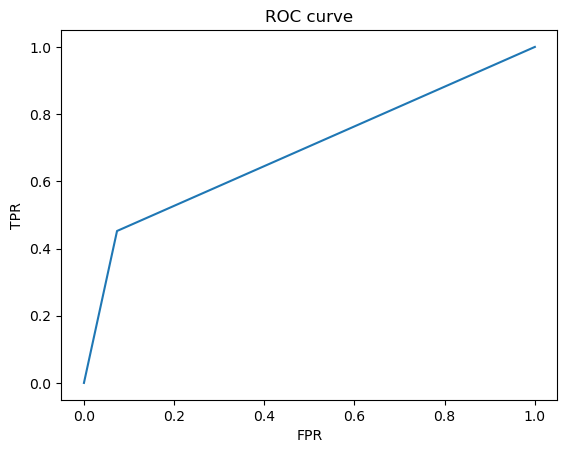

In [82]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Implementar treino com Support Vector Machines (SVM's)

Num passo seguinte, procedeu-se à tentativa do treino através de support vector machines.

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34540 entries, 37239 to 12772
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       34540 non-null  float64
 1   job_0     34540 non-null  int64  
 2   job_1     34540 non-null  int64  
 3   job_2     34540 non-null  int64  
 4   job_3     34540 non-null  int64  
 5   default   34540 non-null  int64  
 6   balance   34540 non-null  float64
 7   housing   34540 non-null  int64  
 8   loan      34540 non-null  int64  
 9   day       34540 non-null  int64  
 10  month     34540 non-null  int64  
 11  duration  34540 non-null  int64  
 12  campaign  34540 non-null  int64  
 13  pdays     34540 non-null  int64  
 14  previous  34540 non-null  int64  
 15  poutcome  34540 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 4.5 MB


In [84]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X_train, np.ravel(y_train), cv=10)
scores

array([0.89171975, 0.89200926, 0.88766647, 0.88621888, 0.89432542,
       0.89229878, 0.88882455, 0.88824551, 0.89114071, 0.88621888])

In [85]:
print("%0.2f accuracy" % (scores.mean() * 100))

88.99 accuracy


In [86]:
model = SVC(random_state=2021)
model.fit(X_train, np.ravel(y_train))

SVC(random_state=2021)

In [87]:
predictions = model.predict(X_test)

In [88]:
print("%0.2f accuracy" % accuracy_score(y_test, predictions))

0.89 accuracy


/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


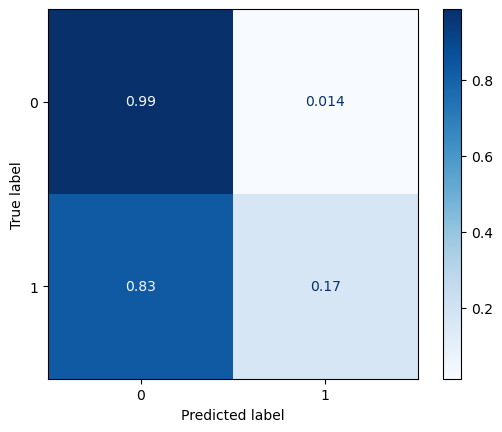

In [89]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [90]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7632
           1       0.61      0.17      0.27      1004

    accuracy                           0.89      8636
   macro avg       0.76      0.58      0.60      8636
weighted avg       0.87      0.89      0.86      8636



In [94]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [95]:
grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3, n_jobs=-1)

In [96]:
grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.884 total time= 2.7min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.884 total time= 2.8min
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.884 total time= 2.6min
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.884 total time= 2.8min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time= 6.9min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time= 7.0min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time= 7.0min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time= 7.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time= 7.2min
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.884 total time= 2.8min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time= 8.7min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(random_state=2021), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [97]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [98]:
grid.best_estimator_

SVC(C=1, gamma=0.01, random_state=2021)

/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


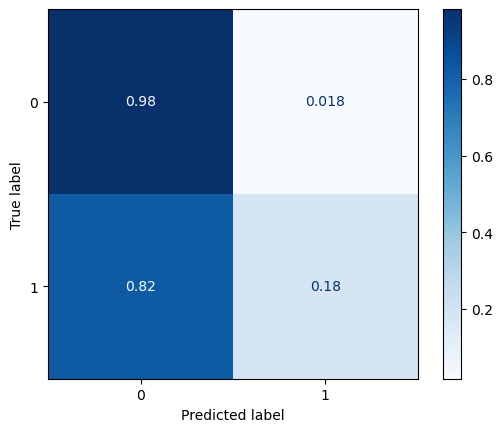

In [100]:
plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [101]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7632
           1       0.56      0.18      0.27      1004

    accuracy                           0.89      8636
   macro avg       0.73      0.58      0.61      8636
weighted avg       0.86      0.89      0.86      8636



### Implementar o treino com MLP (redes neurais)

Por fim, aplicar o treino com MLP's.

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

2022-11-23 16:40:24.260768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [103]:
RANDOM_SEED = 2021

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.10.0


In [104]:
#Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
#scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
#y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [105]:
X.head()

,age,job_0,job_1,job_2,job_3,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,3.0,0,0,0,1,0,0.512024,1,0,5,5,261,1,-1,0,-1
1,2.0,0,0,1,0,0,-0.270070,1,0,5,5,151,1,-1,0,-1
2,1.0,0,0,1,1,0,-0.280059,1,1,5,5,76,1,-1,0,-1
3,1.0,0,0,0,1,0,-0.195339,1,0,5,5,139,1,-1,0,-1
4,0.0,0,0,0,1,0,-0.115427,1,1,5,5,217,1,-1,0,-1


In [106]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y)

In [108]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(32, input_dim=16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    return model

In [109]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


2022-11-23 16:41:02.559896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 16:41:02.566381: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [110]:
TUNING_DICT = {
    #'activation': ['relu', 'sigmoid'],
    'learning_rate' : [0.01, 0.001],
    'batch_size' : [32],
    'epochs' : [20]
}

In [113]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = 'accuracy',
                           refit= 'True',
                           verbose = 1,
                           n_jobs = -1)

grid_search.fit(X_train, y_train, validation_split=0.2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_12225/3310072646.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)
2022-11-23 16:41:43.024709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 16:41:43.042843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
691/691 [==============================] - 11s 11ms/step - loss: 0.2844 - accuracy: 0.8912 - val_loss: 0.2525 - val_accuracy: 0.8961
Epoch 2/20
691/691 [==============================] - 11s 12ms/step - loss: 0.2815 - accuracy: 0.8922 - val_loss: 0.2417 - val_accuracy: 0.9019
Epoch 2/20
691/691 [==============================] - 11s 12ms/step - loss: 0.2908 - accuracy: 0.8877 - val_loss: 0.2572 - val_accuracy: 0.8949
Epoch 2/20
691/691 [==============================] - 10s 11ms/step - loss: 0.3302 - accuracy: 0.8867 - val_loss: 0.2756 - val_accuracy: 0.8983
Epoch 2/20
691/691 [==============================] - 11s 12ms/step - loss: 0.3444 - accuracy: 0.8823 - val_loss: 0.2920 - val_accuracy: 0.8951
Epoch 2/20
691/691 [==============================] - 11s 12ms/step - loss: 0.2903 - accuracy: 0.8870 - val_loss: 0.2698 - val_accuracy: 0.8822
Epoch 2/20
691/691 [=================

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9bc47b9a60>,
             n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [20],
                         'learning_rate': [0.01, 0.001]},
             refit='True', scoring='accuracy', verbose=1)

In [114]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
accuracy = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for accuracy, param in zip(accuracy, params):
    print("%f with: %r" % (accuracy, param))

Best: 0.898900 using {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01}
0.898900 with: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01}
0.897887 with: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001}


In [115]:
best_mlp_model = grid_search.best_estimator_

In [116]:
from livelossplot import PlotLossesKerasTF

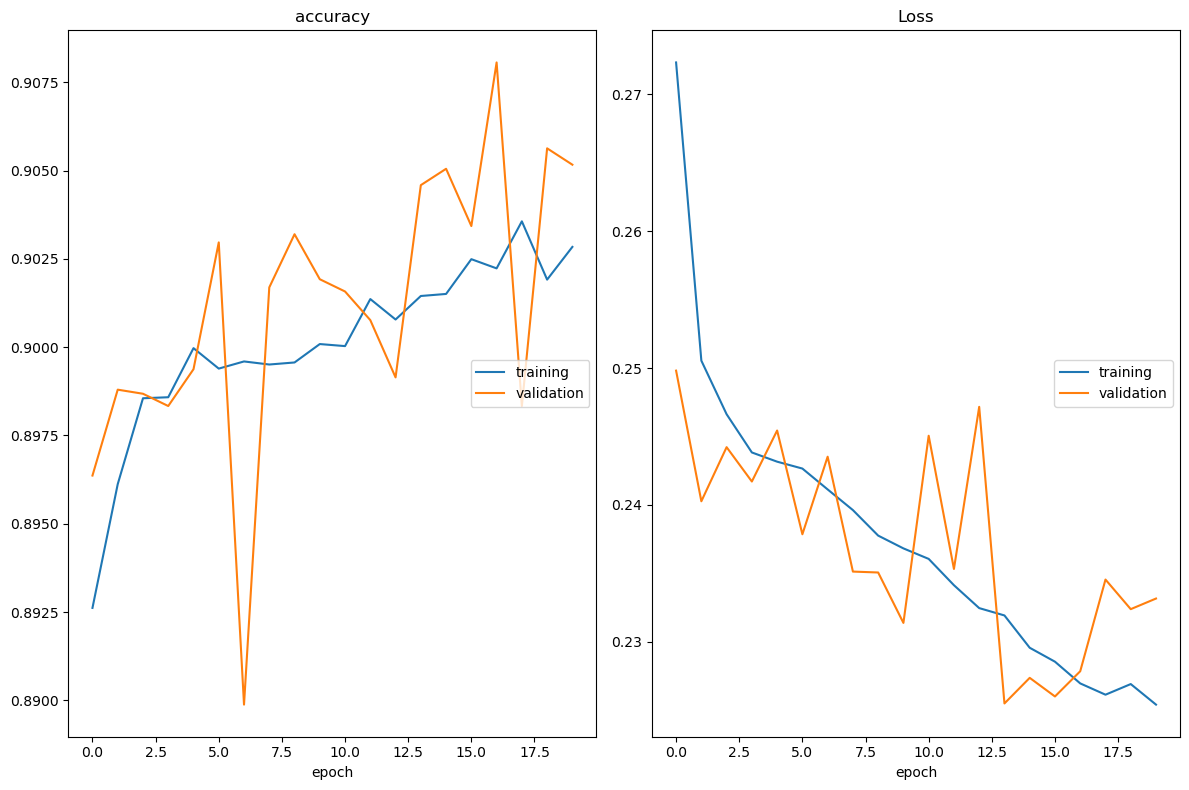

accuracy
	training         	 (min:    0.893, max:    0.904, cur:    0.903)
	validation       	 (min:    0.890, max:    0.908, cur:    0.905)
Loss
	training         	 (min:    0.225, max:    0.272, cur:    0.225)
	validation       	 (min:    0.225, max:    0.250, cur:    0.233)
1080/1080 [==============================] - 14s 13ms/step - loss: 0.2254 - accuracy: 0.9028 - val_loss: 0.2332 - val_accuracy: 0.9052


In [117]:
best_mlp_model.fit(X_train, y_train, 
                   validation_data=(X_test, y_test),
                   callbacks=[PlotLossesKerasTF()], verbose=1)

In [139]:
predictions = best_mlp_model.predict(X_test)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [140]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.8791785686713502
Mean Squared Error: 0.8791785686713502
Root Mean Squared Error: 0.9376452253765015


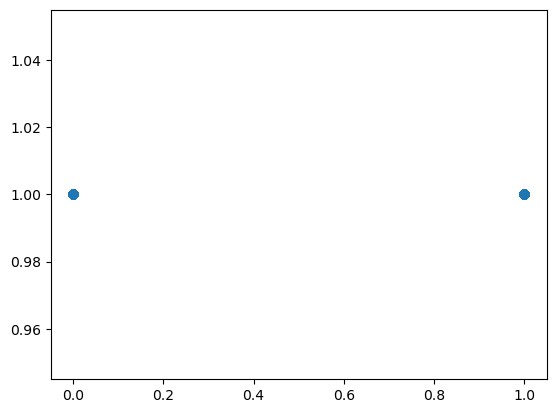

In [141]:
plt.scatter(y_test, predictions)